# **Assignment (Running time and Time complexity)**



---


> ### **2022CSB093 - Karan Kumar**


> ## **Software Engineering Laboratory**


---







## **Tower of Hanoi**

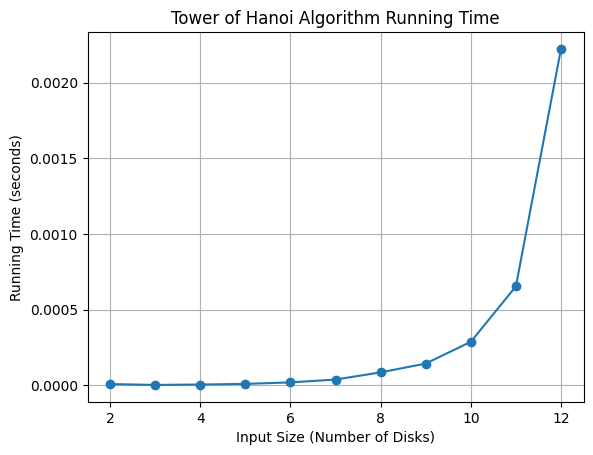

In [ ]:
import time
import matplotlib.pyplot as plt

def tower_of_hanoi(n, source, target, auxiliary):
    if n > 0:
        # Move n-1 disks from source to auxiliary peg
        tower_of_hanoi(n - 1, source, auxiliary, target)

        # Move the nth disk from source to target peg
        # (Print or process the move if needed)

        # Move n-1 disks from auxiliary to target peg
        tower_of_hanoi(n - 1, auxiliary, target, source)

# Function to measure the running time of Tower of Hanoi
def measure_running_time(n):
    start_time = time.time()

    # Run Tower of Hanoi algorithm
    tower_of_hanoi(n, 'A', 'C', 'B')

    end_time = time.time()
    return end_time - start_time

# Varying input size
input_sizes = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Measure running time for each input size
running_times = [measure_running_time(n) for n in input_sizes]

# Plotting the graph
plt.plot(input_sizes, running_times, marker='o')
plt.xlabel('Input Size (Number of Disks)')
plt.ylabel('Running Time (seconds)')
plt.title('Tower of Hanoi Algorithm Running Time')
plt.grid(True)
plt.show()


Hence by seeing the graph we can conclude the time complexity is O(2^n).

## **Merge Sort**

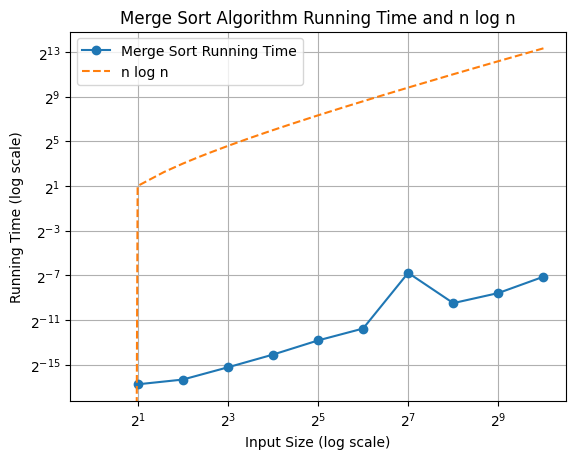

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

# Merge Sort algorithm
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        # Recursive call for each half
        merge_sort(left_half)
        merge_sort(right_half)

        # Merge the two halves
        merge(arr, left_half, right_half)

def merge(arr, left, right):
    i = j = k = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1

    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1

    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1

# Function to measure the running time of Merge Sort
def measure_running_time(n):
    arr = list(range(n, 0, -1))  # Creating a reversed sorted array as an input for worst-case scenario
    start_time = time.time()
    merge_sort(arr)
    end_time = time.time()
    return end_time - start_time

# Calculate n log n values for the plot
n_log_n_values = [n * np.log2(n) for n in range(1, max(input_sizes) + 1)]

# Varying input size
input_sizes = [2**i for i in range(1, 11)]  # Varying from 2 to 1024

# Measure running time for each input size
running_times = [measure_running_time(n) for n in input_sizes]

# Plotting the graph
plt.plot(input_sizes, running_times, marker='o', label='Merge Sort Running Time')
plt.plot(range(1, max(input_sizes) + 1), n_log_n_values, label='n log n', linestyle='--')
plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.xlabel('Input Size (log scale)')
plt.ylabel('Running Time (log scale)')
plt.title('Merge Sort Algorithm Running Time and n log n')
plt.legend()
plt.grid(True)
plt.show()


This can be concluded that the running time is linearly increasing with nlog(n), hence Time complexity is O(nlogn).

## **N-Queens Problem**

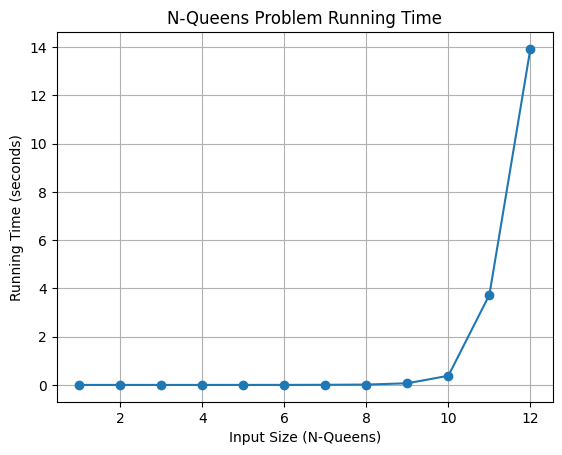

In [ ]:
import time
import matplotlib.pyplot as plt

# Function to solve the N-Queens problem and count solutions
def n_queens_solutions(n):
    def is_safe(board, row, col):
        # Check if there is a queen in the same column
        for i in range(row):
            if board[i] == col or \
               board[i] - i == col - row or \
               board[i] + i == col + row:
                return False
        return True

    def solve_n_queens(board, row):
        nonlocal solution_count
        if row == n:
            # Found a solution
            solution_count += 1
            return
        for col in range(n):
            if is_safe(board, row, col):
                board[row] = col
                solve_n_queens(board, row + 1)

    solution_count = 0
    board = [-1] * n
    solve_n_queens(board, 0)
    return solution_count

# Function to measure the running time of N-Queens problem
def measure_running_time(n):
    start_time = time.time()
    n_queens_solutions(n)
    end_time = time.time()
    return end_time - start_time

# Varying input size
input_sizes = list(range(1, 13))  # Varying from 1 to 13 for practical reasons

# Measure running time for each input size
running_times = [measure_running_time(n) for n in input_sizes]

# Plotting the graph
plt.plot(input_sizes, running_times, marker='o')
plt.xlabel('Input Size (N-Queens)')
plt.ylabel('Running Time (seconds)')
plt.title('N-Queens Problem Running Time')
plt.grid(True)
plt.show()


From the graph we can conclude that the time complexity of N-Queen Algorithm is O(2^n).

## Djikstra's Algorithm

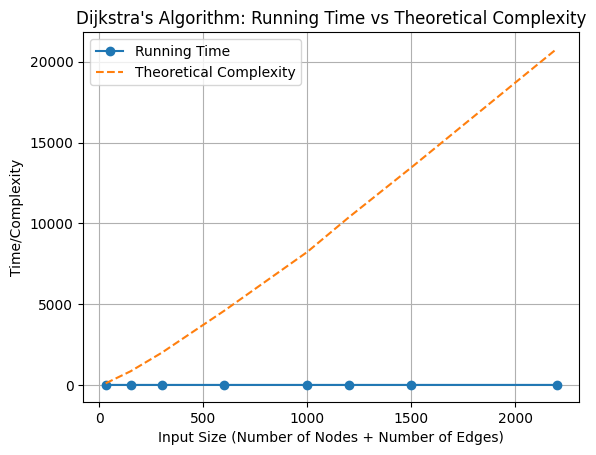

In [ ]:
import time
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import heapq

def dijkstra(graph, start):
    num_nodes = len(graph)
    distance = [float('inf')] * num_nodes
    distance[start] = 0

    # Priority queue to store (distance, node) pairs
    priority_queue = [(0, start)]

    while priority_queue:
        current_dist, current_node = heapq.heappop(priority_queue)

        # Skip if this node has already been processed with a shorter distance
        if current_dist > distance[current_node]:
            continue

        # Update the distances of neighboring nodes
        for neighbor in range(num_nodes):
            edge_weight = graph[current_node][neighbor]
            if edge_weight > 0:
                new_dist = distance[current_node] + edge_weight
                if new_dist < distance[neighbor]:
                    distance[neighbor] = new_dist
                    heapq.heappush(priority_queue, (new_dist, neighbor))

    return distance

# Function to measure the running time of Dijkstra's algorithm
def measure_running_time(num_nodes, num_edges):
    graph = generate_random_graph(num_nodes, num_edges)
    start_node = 0  # You can choose any start node
    start_time = time.time()
    dijkstra_result = dijkstra(graph, start_node)
    end_time = time.time()
    return end_time - start_time

# Function to generate a random weighted graph
def generate_random_graph(num_nodes, num_edges):
    G = nx.gnm_random_graph(num_nodes, num_edges)
    weights = {(u, v): np.random.randint(1, 10) for (u, v) in G.edges()}
    nx.set_edge_attributes(G, weights, "weight")

    # Convert the graph to an adjacency matrix
    graph = np.zeros((num_nodes, num_nodes))
    for edge in G.edges(data=True):
        u, v, w = edge
        graph[u][v] = w["weight"]
        graph[v][u] = w["weight"]

    return graph

# Varying input size
input_sizes = [(10, 20), (50, 100), (100, 200), (200, 400), (300, 700), (400, 800), (500, 1000), (700, 1500)]  # Varying nodes and edges

# Measure running time and theoretical time complexity for each input size
running_times = []
theoretical_complexity = []
for nodes, edges in input_sizes:
    running_time = measure_running_time(nodes, edges)
    running_times.append(running_time)

    # Theoretical time complexity: O((V + E) log V)
    theoretical_complexity.append((nodes + edges) * np.log2(nodes))

# Plotting the comparison
plt.plot([nodes + edges for nodes, edges in input_sizes], running_times, marker='o', label='Running Time')
plt.plot([nodes + edges for nodes, edges in input_sizes], theoretical_complexity, linestyle='--', label='Theoretical Complexity')
plt.xlabel('Input Size (Number of Nodes + Number of Edges)')
plt.ylabel('Time/Complexity')
plt.title("Dijkstra's Algorithm: Running Time vs Theoretical Complexity")
plt.legend()
plt.grid(True)
plt.show()


The theoretical complexity is (V+E)*log(V) where V = Number of nodes, E = Number of edges.

Hence from the graph we can see that the time taken by the algorithm is linear with Theoretical Complexity and hence we can conclude that the time complexity of the algorithm is O((V+E)*log(V)).

## **Kruskal's Algorithm**

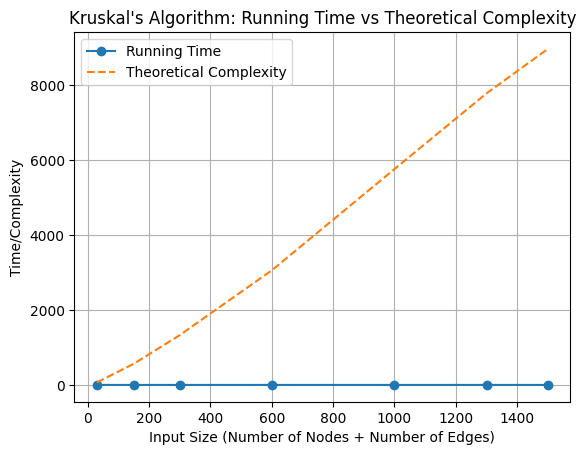

In [ ]:
import time
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import heapq

def kruskal(graph):
    num_nodes = len(graph)
    edges = []
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):
            if graph[i][j] > 0:
                edges.append((i, j, graph[i][j]))

    # Sort edges by weight
    edges.sort(key=lambda x: x[2])

    parent = list(range(num_nodes))
    rank = [0] * num_nodes
    mst_edges = []

    def find_set(x):
        if parent[x] != x:
            parent[x] = find_set(parent[x])
        return parent[x]

    def union_sets(x, y):
        root_x = find_set(x)
        root_y = find_set(y)
        if rank[root_x] < rank[root_y]:
            parent[root_x] = root_y
        elif rank[root_x] > rank[root_y]:
            parent[root_y] = root_x
        else:
            parent[root_x] = root_y
            rank[root_y] += 1

    for edge in edges:
        u, v, w = edge
        if find_set(u) != find_set(v):
            mst_edges.append(edge)
            union_sets(u, v)

    return mst_edges

# Function to measure the running time of Kruskal's algorithm
def measure_running_time(num_nodes, num_edges):
    graph = generate_random_graph(num_nodes, num_edges)
    start_time = time.time()
    kruskal_result = kruskal(graph)
    end_time = time.time()
    return end_time - start_time

# Function to generate a random weighted graph
def generate_random_graph(num_nodes, num_edges):
    G = nx.gnm_random_graph(num_nodes, num_edges)
    weights = {(u, v): np.random.randint(1, 10) for (u, v) in G.edges()}
    nx.set_edge_attributes(G, weights, "weight")

    # Convert the graph to an adjacency matrix
    graph = np.zeros((num_nodes, num_nodes))
    for edge in G.edges(data=True):
        u, v, w = edge
        graph[u][v] = w["weight"]
        graph[v][u] = w["weight"]

    return graph

# Varying input size
input_sizes = [(10, 20), (50, 100), (100, 200), (200, 400), (300, 700), (400, 900), (500, 1000)]  # Varying nodes and edges

# Measure running time and theoretical time complexity for each input size
running_times = []
theoretical_complexity = []
for nodes, edges in input_sizes:
    running_time = measure_running_time(nodes, edges)
    running_times.append(running_time)

    # Theoretical time complexity: O(E log V)
    theoretical_complexity.append(edges * np.log2(nodes))

# Plotting the comparison
plt.plot([nodes + edges for nodes, edges in input_sizes], running_times, marker='o', label='Running Time')
plt.plot([nodes + edges for nodes, edges in input_sizes], theoretical_complexity, linestyle='--', label='Theoretical Complexity')
plt.xlabel('Input Size (Number of Nodes + Number of Edges)')
plt.ylabel('Time/Complexity')
plt.title("Kruskal's Algorithm: Running Time vs Theoretical Complexity")
plt.legend()
plt.grid(True)
plt.show()


The theoretical complexity is E*log(V) where V = Number of nodes, E = Number of edges.

Hence from the graph we can see that the time taken by the algorithm is linear with Theoretical Complexity and hence we can conclude that the time complexity of the algorithm is O(E*log(V)).